<h3>Importing the Libraries

In [1]:
import os
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
from copy import deepcopy
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR

<h3>Manually performing OneHot Encoding on Alphabets and 'eon'

In [2]:
alphabets = ["eon", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
encoded_alphabets = np.zeros((len(alphabets), len(alphabets)))
for i in range(len(alphabets)):
    encoded_alphabets[i][i] = 1

<h3>Reading Input Text File

In [3]:
for files in os.listdir():
        filename, extension = os.path.splitext(files)
        if extension == '.txt':
            input_filename = files
with open(input_filename) as f:
    lines = f.readlines()

words = np.zeros((len(lines), 11), dtype='U16')

for name_index in range(len(lines)):
    name = lines[name_index].lower().strip()
    for character_index in range(len(name)):
        words[name_index][character_index] = name[character_index]
    for empty_index in range(len(name), 11):
        words[name_index][empty_index] = 'eon'
        
words_copy = deepcopy(words)

In [4]:
desired_output = deepcopy(words)
for i in range(len(words_copy)):
    temp_array = np.delete(words_copy[i], 0)
    desired_output[i] = np.append(temp_array, 'eon')

In [5]:
inputs = np.ones((2000, 11, 27), dtype = 'double')
for name_index in range(len(words)):
    for char_index in range(len(words[name_index])):
        character = words[name_index][char_index]
        encoded_index = alphabets.index(character)
        inputs[name_index][char_index] = encoded_alphabets[encoded_index]

In [6]:
outputs = np.ones((2000, 11, 27), dtype = 'double')
for name_index in range(len(words)):
    for char_index in range(len(words[name_index])):
        character = words[name_index][char_index]
        encoded_index = alphabets.index(character)
        outputs[name_index][char_index] = encoded_alphabets[encoded_index]

<h3>Creating Tensors for Inputs and Desired Outputs

In [7]:
inputs = torch.tensor(inputs).float()
outputs = torch.tensor(outputs).float()

<h3>Declaring Custom Dataset Class

In [8]:
class CustomDataset(Dataset):
    def __init__(self):
        pass
        
    def __len__(self):
        return len(inputs)
    
    def __getitem__(self, index):
        return inputs[index]

<h3>Initializing DataLoader

In [9]:
train_loader = DataLoader(dataset = inputs, batch_size = 1, shuffle = False)

<h3>Declaring Neural Network Layers for LSTM Operation

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden_1 = nn.LSTM(27, 27)
        self.fc1 = nn.Linear(27, 27)
        self.fc2 = nn.Linear(27, 27)
        
    def forward(self, output):
        output, hidden = self.hidden_1(output)
        output = self.fc1(output)
        output = self.fc2(output)
        return output, hidden

<h3>Training the Neural Network and Saving the Model

In [20]:
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = (1e-4))
#Arrays used to plot the Epochs vs Loss plot
epoch_tracker = []
error_tracker = []

for epoch in range(15):
    epoch_tracker.append(epoch)
    index = 0
    for batch_index, name in enumerate(train_loader):
        obtained_output, hidden = model(name)
        training_loss = criterion(obtained_output, outputs[index].unsqueeze(0))
        index = index + 1
        optimizer.zero_grad()
        training_loss.backward()
        optimizer.step()
    print(f'| Epoch: {epoch + 1} |  Training Cost: {round(training_loss.item(), 3)} |')
    error_tracker.append(training_loss.item())
    
torch.save(model.state_dict(), "model.pth")

| Epoch: 1 |  Training Cost: 0.649 |
| Epoch: 2 |  Training Cost: 0.517 |
| Epoch: 3 |  Training Cost: 0.465 |
| Epoch: 4 |  Training Cost: 0.438 |
| Epoch: 5 |  Training Cost: 0.416 |
| Epoch: 6 |  Training Cost: 0.403 |
| Epoch: 7 |  Training Cost: 0.399 |
| Epoch: 8 |  Training Cost: 0.398 |
| Epoch: 9 |  Training Cost: 0.398 |
| Epoch: 10 |  Training Cost: 0.398 |
| Epoch: 11 |  Training Cost: 0.398 |
| Epoch: 12 |  Training Cost: 0.398 |
| Epoch: 13 |  Training Cost: 0.398 |
| Epoch: 14 |  Training Cost: 0.398 |
| Epoch: 15 |  Training Cost: 0.398 |


<h3>Plotting the Training Loss vs Epoch graph

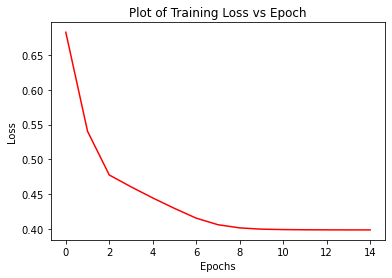

In [12]:
plt.plot(epoch_tracker, error_tracker, color = 'red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Plot of Training Loss vs Epoch")
plt.show()